In [1]:
from vierlinden.config import model_output_path
from vierlinden.data.loader import VierlindenDataProcessor
from vierlinden.model.model import NHiTSTrainingWrapper, NHiTSPredictionWrapper
from vierlinden.model.model import NHiTSPredictionWrapper
from pytorch_forecasting.metrics import QuantileLoss, MAE, MASE, RMSE

seed = 42

context_length = 50
prediction_length = 10
batch_size = 32
num_workers = 18

def main(arg : str):
    dp = VierlindenDataProcessor()
    df = dp.load_processed_data()
    df = dp.prepare_for_target(df, arg)
    
    training_df, test_df = dp.split_data(df)
    
    nhits_wrapper = NHiTSTrainingWrapper(training_df, 
                                         target_col = arg, 
                                         context_length = context_length, 
                                         prediction_length = prediction_length,
                                         batch_size = batch_size, 
                                         num_workers = num_workers)
    optimal_lr = nhits_wrapper.find_optimal_learningrate(seed = seed)
    
    print(f"Optimal learning rate for {arg}: {optimal_lr}")
    
    best_model = nhits_wrapper.train(optimal_lr, loss = RMSE(), seed = seed)
    
    return nhits_wrapper, test_df

/storage/.venv/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


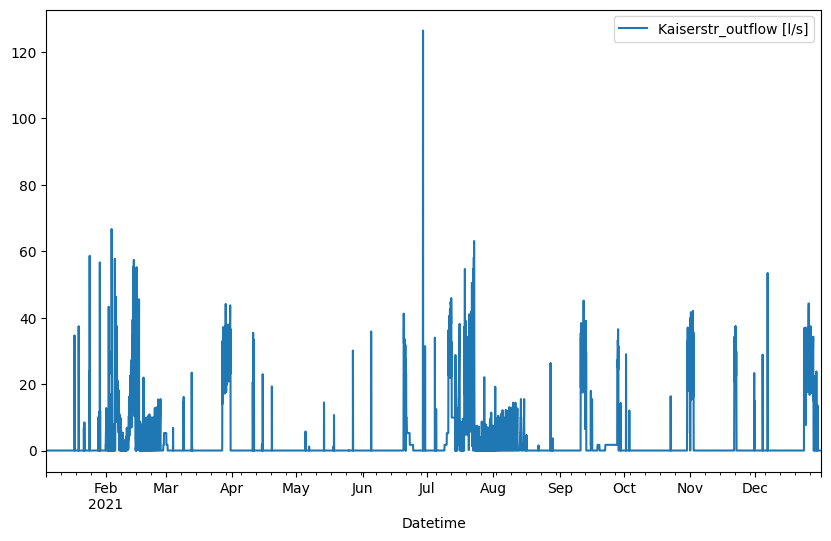

In [2]:
dp = VierlindenDataProcessor()
df = dp.load_processed_data()
df = dp.prepare_for_target(df, 'Kaiserstr_outflow [l/s]')
dp.plot_target_col('Kaiserstr_outflow [l/s]')

In [3]:
dp = VierlindenDataProcessor()
df = dp.load_processed_data()
df = dp.prepare_for_target(df, 'Kaiserstr_outflow [l/s]')

training_df, test_df = VierlindenDataProcessor.split_data(df, train_frac=0.9)
test_df.shape

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.


INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


(868, 24)

In [17]:
nhits_wrapper, test_df = main('Kaiserstr_outflow [l/s]')
nhits_wrapper.save_trained_model(model_output_path + "/"  + 'NHiTS_Kaiserstr_model.pt')

model = nhits_wrapper.best_model

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.
INFO:vierlinden.model.model:Training and validation data and data loaders created successfully.
Global seed set to 42
Finding best initial lr: 100%|██████████| 100/100 [00:01<00:00, 75.52it/s]
INFO:vierlinden.model.model:Start setting up trainer and network.
Global seed set to 42
INFO:vierlinden.model.model:Setup succesful. Starting training procedure.


Optimal learning rate for Kaiserstr_outflow [l/s]: 5.623413251903491e-05



  | Name            | Type           | Params
---------------------------------------------------
0 | loss            | RMSE           | 0     
1 | logging_metrics | ModuleList     | 0     
2 | embeddings      | MultiEmbedding | 0     
3 | model           | NHiTS          | 919 K 
---------------------------------------------------
919 K     Trainable params
0         Non-trainable params
919 K     Total params
3.679     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 193/193 [00:26<00:00,  7.36it/s, v_num=0, train_loss_step=8.350, val_loss=2.280, train_loss_epoch=6.160]

Metric val_loss improved. New best score: 2.277


Epoch 1: 100%|██████████| 193/193 [00:25<00:00,  7.69it/s, v_num=0, train_loss_step=5.650, val_loss=2.260, train_loss_epoch=6.130]

Metric val_loss improved by 0.021 >= min_delta = 0.0001. New best score: 2.256


Epoch 2: 100%|██████████| 193/193 [00:26<00:00,  7.34it/s, v_num=0, train_loss_step=9.240, val_loss=2.240, train_loss_epoch=6.060]

Metric val_loss improved by 0.015 >= min_delta = 0.0001. New best score: 2.241


Epoch 3: 100%|██████████| 193/193 [00:25<00:00,  7.54it/s, v_num=0, train_loss_step=7.640, val_loss=2.230, train_loss_epoch=6.010]

Metric val_loss improved by 0.015 >= min_delta = 0.0001. New best score: 2.226


Epoch 4:   0%|          | 0/193 [00:00<?, ?it/s, v_num=0, train_loss_step=7.640, val_loss=2.230, train_loss_epoch=6.010]          

Swapping scheduler `ReduceLROnPlateau` for `SWALR`


Epoch 4: 100%|██████████| 193/193 [00:29<00:00,  6.47it/s, v_num=0, train_loss_step=2.900, val_loss=2.220, train_loss_epoch=5.940]

Metric val_loss improved by 0.005 >= min_delta = 0.0001. New best score: 2.221


Epoch 5: 100%|██████████| 193/193 [00:27<00:00,  7.12it/s, v_num=0, train_loss_step=3.330, val_loss=2.220, train_loss_epoch=5.960]

Metric val_loss improved by 0.004 >= min_delta = 0.0001. New best score: 2.217


Epoch 7: 100%|██████████| 193/193 [00:25<00:00,  7.60it/s, v_num=0, train_loss_step=6.890, val_loss=2.220, train_loss_epoch=5.860]

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 2.216


Epoch 17: 100%|██████████| 193/193 [00:32<00:00,  5.95it/s, v_num=0, train_loss_step=3.880, val_loss=2.250, train_loss_epoch=5.650]

Monitored metric val_loss did not improve in the last 10 records. Best score: 2.216. Signaling Trainer to stop.


Epoch 17: 100%|██████████| 193/193 [00:32<00:00,  5.92it/s, v_num=0, train_loss_step=3.880, val_loss=2.250, train_loss_epoch=5.650]


INFO:vierlinden.model.model:Training procedure completed.
INFO:vierlinden.model.model:Cleaning up logging files.
INFO:vierlinden.model.model:Logging files cleaned up.


[6.159276008605957, 6.126034736633301, 6.064460754394531, 6.007684230804443, 5.940195083618164, 5.959883213043213, 5.8794989585876465, 5.86343240737915, 5.842985153198242, 5.787831783294678, 5.7502570152282715, 5.768099784851074, 5.620401859283447, 5.665560245513916, 5.5901570320129395, 5.607446670532227, 5.586414337158203, 5.6515374183654785]
[2.276914119720459, 2.256052255630493, 2.2411081790924072, 2.226408004760742, 2.2209222316741943, 2.2167575359344482, 2.2215654850006104, 2.2155842781066895, 2.2256152629852295, 2.2201528549194336, 2.2356884479522705, 2.230100631713867, 2.230902910232544, 2.229759693145752, 2.234844207763672, 2.243497848510742, 2.2360897064208984, 2.2480671405792236]


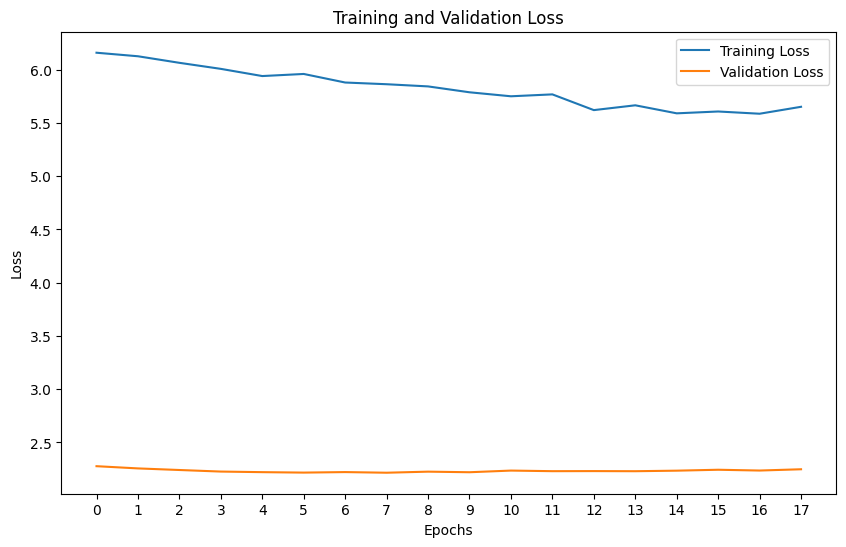

In [18]:
print(nhits_wrapper.metrics_callback.metrics["train_loss"])
print(nhits_wrapper.metrics_callback.metrics["val_loss"])

nhits_wrapper.plot_training_result()

## MASE

In [4]:
model = NHiTSTrainingWrapper.load_trained_model(model_output_path + "/"  + 'NHiTS_Kaiserstr_model_mase.pt')

In [5]:
prediction_wrapper = NHiTSPredictionWrapper(model, context_length=context_length, prediction_length=prediction_length, target_col='Kaiserstr_outflow [l/s]')
prediction_df = prediction_wrapper.predict(test_df)

You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
/storage/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/storage/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the va

In [6]:
prediction_df.iloc[110:120]

,Datetime,Schieber Position_pval,Oberwasser_pval,Unterwasser_pval,Durchflumenge_pval,Berechnete Durchflussmenge_pval,Fllstand SWS_pval,Fllstand RWS_pval,Strom P1_pval,Strom P2_pval,...,Strom Pumpe 1_pval,Strom Pumpe 2_pval,Fllstand Pumpensumpf_pval1,Strom Pumpe 1_pval1,Strom Pumpe 2_pval1,Strom Pumpe 3_pval,Niederschlag,Füllstand_RRB,Kaiserstr_outflow [l/s],Predicted Forecast
110,2021-11-30 10:00:00,100.0,18.578947,12.140625,41.424528,39.932039,102.900000,35.000000,7.000000,0.000000,...,1.064516,0.677419,91.021739,3.548387,0.0,1.0,0.900000,0.67,0.000000,"[1.3457965053476073e-07, 1.268651743657756e-07..."
111,2021-11-30 11:00:00,100.0,18.518072,12.318841,41.348624,38.694444,75.859649,35.000000,5.842105,0.000000,...,0.580645,0.000000,91.051948,0.000000,0.0,1.0,0.885366,0.67,0.000000,"[1.712811297238659e-07, 1.6499556920734904e-07..."
112,2021-11-30 12:00:00,100.0,20.239437,13.214286,46.018868,46.231481,75.633333,35.000000,5.066667,0.000000,...,0.580645,1.000000,89.252632,3.709677,0.0,1.0,1.237500,0.67,0.000000,"[-7.464716844651775e-08, -7.651942013353619e-0..."
113,2021-11-30 13:00:00,100.0,34.907216,22.023256,130.716667,109.172414,106.850000,35.000000,4.616667,16.666667,...,3.540984,5.078125,109.024096,9.016393,0.0,1.0,2.779592,0.67,0.000000,"[1.8537151902364712e-07, 1.8349660990679695e-0..."
114,2021-11-30 14:00:00,100.0,39.345679,24.333333,157.921053,129.577982,112.516667,35.416667,3.716667,25.150000,...,5.492308,5.000000,126.337079,10.000000,0.0,1.0,2.937391,0.69,0.000000,"[5.141707219991076e-07, 5.033442107560404e-07,..."
115,2021-11-30 15:00:00,100.0,36.766234,22.929577,142.059829,115.964286,118.483333,36.000000,4.000000,16.633333,...,5.343284,5.000000,143.558824,10.000000,0.0,1.0,2.153571,0.70,0.000000,"[5.801480256195646e-07, 5.643600502480695e-07,..."
116,2021-11-30 16:00:00,100.0,39.385542,24.225000,158.060870,131.165138,117.816667,36.500000,3.933333,22.133333,...,5.380282,5.000000,153.394737,10.000000,0.0,1.0,2.651282,1.05,0.000000,"[5.981591471027059e-07, 5.896204697819485e-07,..."
117,2021-11-30 17:00:00,100.0,27.098765,17.081081,84.297297,73.449541,134.150000,37.000000,5.750000,1.833333,...,5.109375,5.000000,150.426966,10.000000,0.0,1.0,0.975000,2.40,23.070505,"[6.081517653910851e-07, 6.148511602077633e-07,..."
118,2021-11-30 18:00:00,100.0,22.397436,14.292683,57.223214,54.355140,134.183333,37.000000,5.800000,3.783333,...,5.132353,5.000000,111.203883,10.000000,0.0,1.0,1.688000,2.45,23.297427,"[17.2728328704834, 16.844480514526367, 16.1522..."
119,2021-11-30 19:00:00,100.0,28.647887,17.860759,91.504505,81.609091,129.883333,37.000000,5.200000,5.466667,...,5.032258,5.000000,89.215909,5.645161,0.0,1.0,1.187755,2.46,1.504694,"[23.652828216552734, 23.66181182861328, 23.051..."


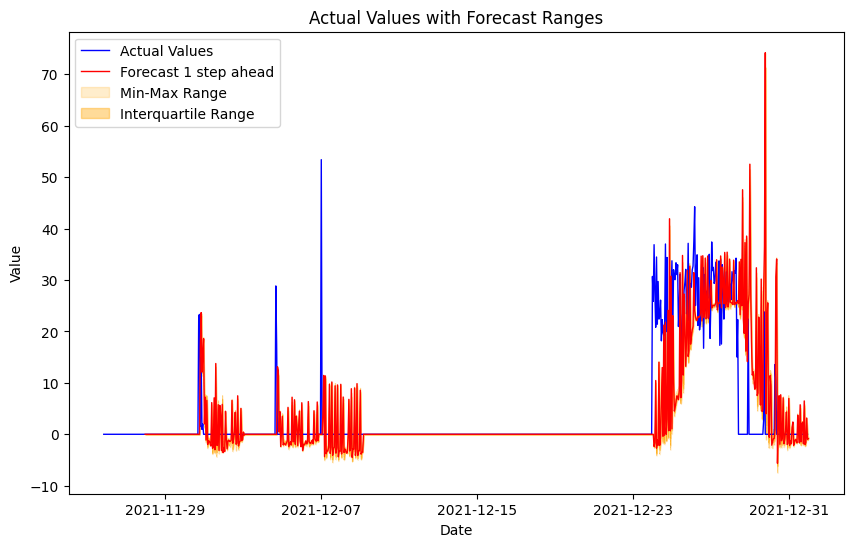

In [7]:
prediction_wrapper.plot_forecast_for_all(forecast_step_ahead=1, plot_forecast_distribution=True)

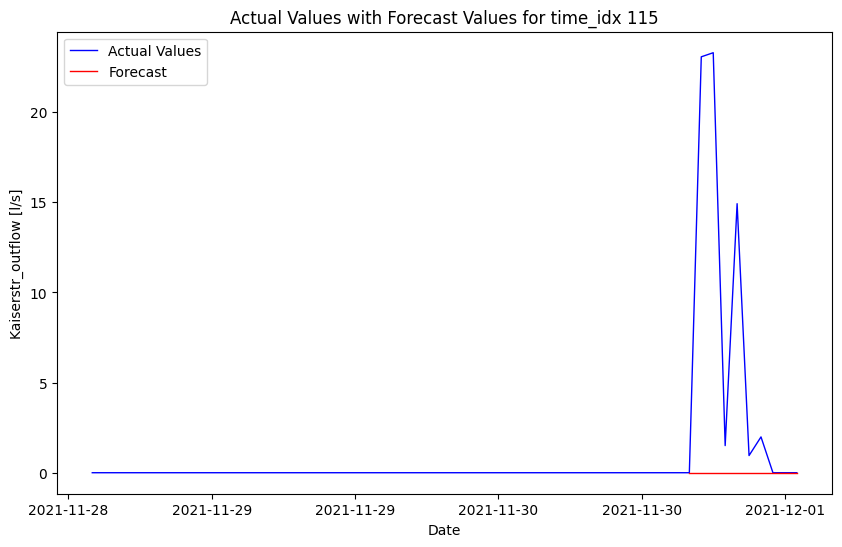

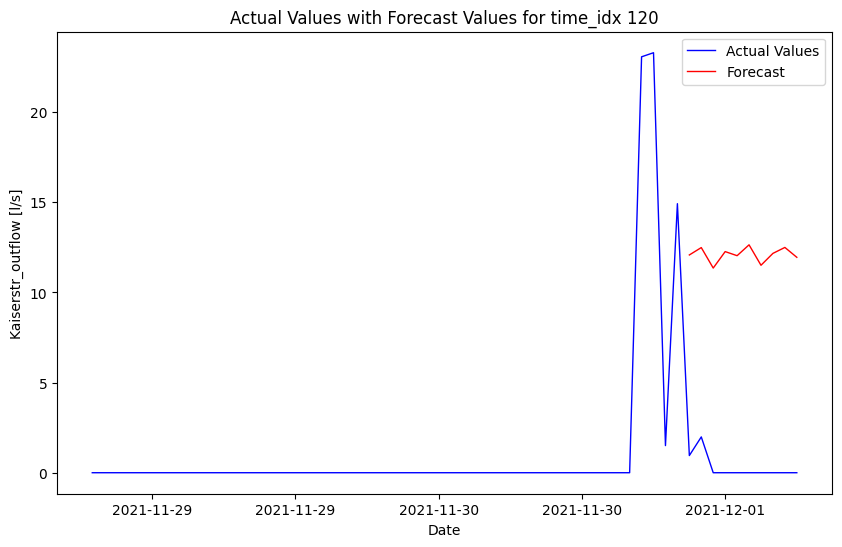

In [8]:
prediction_wrapper.plot_forecast_per_time_idx(115)
prediction_wrapper.plot_forecast_per_time_idx(120)

In [9]:
prediction_wrapper.calculate_mase_loss()

/storage/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


TypeError: MASE.update() missing 1 required positional argument: 'encoder_target'

In [ ]:
print(model)

## MAE

In [ ]:
model = NHiTSTrainingWrapper.load_trained_model(model_output_path + "/"  + 'NHiTS_Kaiserstr_model_mae.pt')

In [ ]:
prediction_wrapper = NHiTSPredictionWrapper(model, context_length=context_length, prediction_length=prediction_length, target_col='Kaiserstr_outflow [l/s]')
prediction_df = prediction_wrapper.predict(test_df)

In [10]:
prediction_df.iloc[110:120]

,Datetime,Schieber Position_pval,Oberwasser_pval,Unterwasser_pval,Durchflumenge_pval,Berechnete Durchflussmenge_pval,Fllstand SWS_pval,Fllstand RWS_pval,Strom P1_pval,Strom P2_pval,...,Strom Pumpe 1_pval,Strom Pumpe 2_pval,Fllstand Pumpensumpf_pval1,Strom Pumpe 1_pval1,Strom Pumpe 2_pval1,Strom Pumpe 3_pval,Niederschlag,Füllstand_RRB,Kaiserstr_outflow [l/s],Predicted Forecast
110,2021-11-30 10:00:00,100.0,18.578947,12.140625,41.424528,39.932039,102.900000,35.000000,7.000000,0.000000,...,1.064516,0.677419,91.021739,3.548387,0.0,1.0,0.900000,0.67,0.000000,"[1.3457965053476073e-07, 1.268651743657756e-07..."
111,2021-11-30 11:00:00,100.0,18.518072,12.318841,41.348624,38.694444,75.859649,35.000000,5.842105,0.000000,...,0.580645,0.000000,91.051948,0.000000,0.0,1.0,0.885366,0.67,0.000000,"[1.712811297238659e-07, 1.6499556920734904e-07..."
112,2021-11-30 12:00:00,100.0,20.239437,13.214286,46.018868,46.231481,75.633333,35.000000,5.066667,0.000000,...,0.580645,1.000000,89.252632,3.709677,0.0,1.0,1.237500,0.67,0.000000,"[-7.464716844651775e-08, -7.651942013353619e-0..."
113,2021-11-30 13:00:00,100.0,34.907216,22.023256,130.716667,109.172414,106.850000,35.000000,4.616667,16.666667,...,3.540984,5.078125,109.024096,9.016393,0.0,1.0,2.779592,0.67,0.000000,"[1.8537151902364712e-07, 1.8349660990679695e-0..."
114,2021-11-30 14:00:00,100.0,39.345679,24.333333,157.921053,129.577982,112.516667,35.416667,3.716667,25.150000,...,5.492308,5.000000,126.337079,10.000000,0.0,1.0,2.937391,0.69,0.000000,"[5.141707219991076e-07, 5.033442107560404e-07,..."
115,2021-11-30 15:00:00,100.0,36.766234,22.929577,142.059829,115.964286,118.483333,36.000000,4.000000,16.633333,...,5.343284,5.000000,143.558824,10.000000,0.0,1.0,2.153571,0.70,0.000000,"[5.801480256195646e-07, 5.643600502480695e-07,..."
116,2021-11-30 16:00:00,100.0,39.385542,24.225000,158.060870,131.165138,117.816667,36.500000,3.933333,22.133333,...,5.380282,5.000000,153.394737,10.000000,0.0,1.0,2.651282,1.05,0.000000,"[5.981591471027059e-07, 5.896204697819485e-07,..."
117,2021-11-30 17:00:00,100.0,27.098765,17.081081,84.297297,73.449541,134.150000,37.000000,5.750000,1.833333,...,5.109375,5.000000,150.426966,10.000000,0.0,1.0,0.975000,2.40,23.070505,"[6.081517653910851e-07, 6.148511602077633e-07,..."
118,2021-11-30 18:00:00,100.0,22.397436,14.292683,57.223214,54.355140,134.183333,37.000000,5.800000,3.783333,...,5.132353,5.000000,111.203883,10.000000,0.0,1.0,1.688000,2.45,23.297427,"[17.2728328704834, 16.844480514526367, 16.1522..."
119,2021-11-30 19:00:00,100.0,28.647887,17.860759,91.504505,81.609091,129.883333,37.000000,5.200000,5.466667,...,5.032258,5.000000,89.215909,5.645161,0.0,1.0,1.187755,2.46,1.504694,"[23.652828216552734, 23.66181182861328, 23.051..."


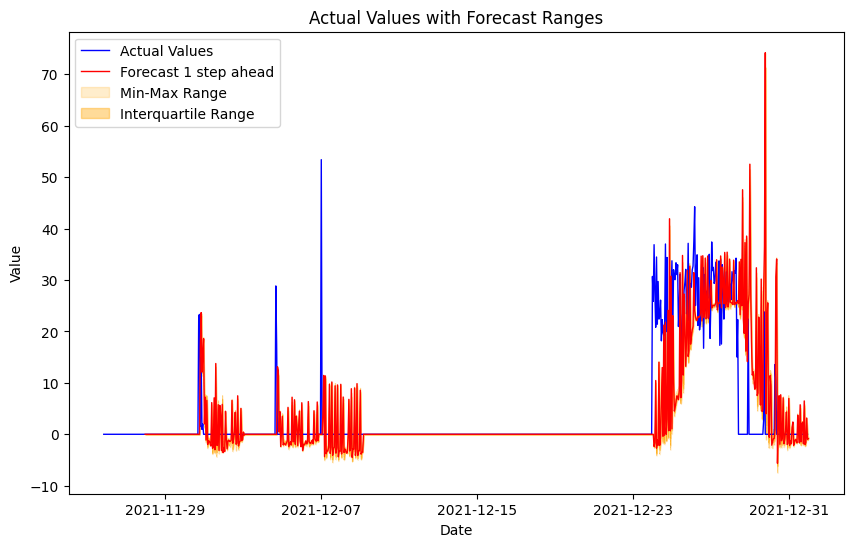

In [11]:
prediction_wrapper.plot_forecast_for_all(forecast_step_ahead=1, plot_forecast_distribution=True)

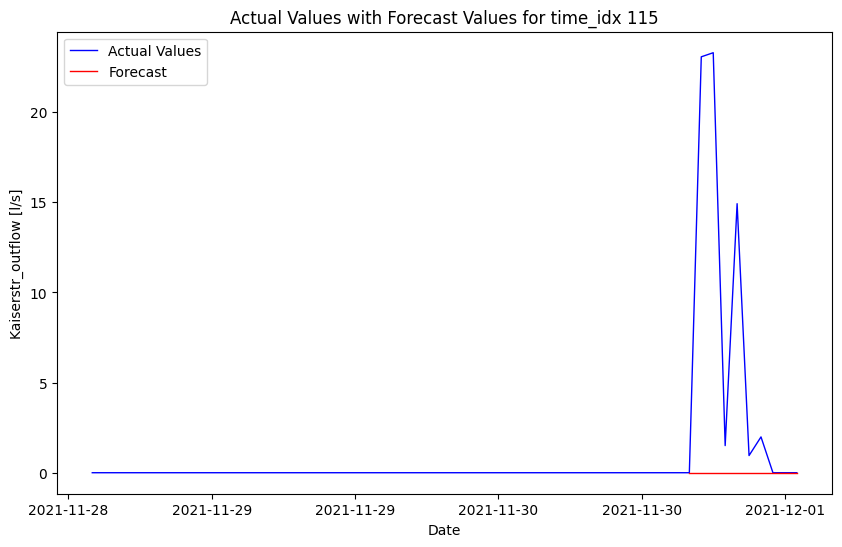

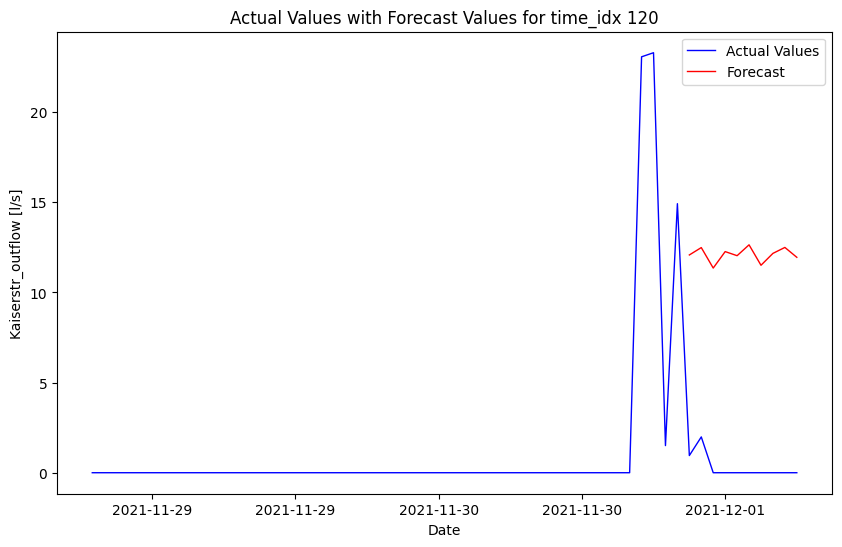

In [12]:
prediction_wrapper.plot_forecast_per_time_idx(115)
prediction_wrapper.plot_forecast_per_time_idx(120)

In [13]:
prediction_wrapper.calculate_mase_loss()

/storage/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


TypeError: MASE.update() missing 1 required positional argument: 'encoder_target'

In [14]:
print(model)

NHiTS(
  	"activation":                        ReLU
  	"backcast_loss_ratio":               1.0
  	"batch_normalization":               False
  	"categorical_groups":                {}
  	"context_length":                    50
  	"downsample_frequencies":            [8, 2, 1]
  	"dropout":                           0.1
  	"embedding_labels":                  {}
  	"embedding_paddings":                []
  	"embedding_sizes":                   {}
  	"hidden_size":                       512
  	"initialization":                    lecun_normal
  	"interpolation_mode":                linear
  	"learning_rate":                     5.623413251903491e-05
  	"log_gradient_flow":                 False
  	"log_interval":                      5
  	"log_val_interval":                  1
  	"logging_metrics":                   ModuleList(
  	  (0): SMAPE()
  	  (1): MAE()
  	  (2): RMSE()
  	  (3): MAPE()
  	  (4): MASE()
  	)
  	"loss":                              MASE()
  	"monotone_constaints"

## RMSE

In [15]:
model = NHiTSTrainingWrapper.load_trained_model(model_output_path + "/"  + 'NHiTS_Kaiserstr_model_rmse.pt')

In [16]:
prediction_wrapper = NHiTSPredictionWrapper(model, context_length=context_length, prediction_length=prediction_length, target_col='Kaiserstr_outflow [l/s]')
prediction_df = prediction_wrapper.predict(test_df)

/storage/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


In [17]:
prediction_df.iloc[110:120]

,Datetime,Schieber Position_pval,Oberwasser_pval,Unterwasser_pval,Durchflumenge_pval,Berechnete Durchflussmenge_pval,Fllstand SWS_pval,Fllstand RWS_pval,Strom P1_pval,Strom P2_pval,...,Strom Pumpe 1_pval,Strom Pumpe 2_pval,Fllstand Pumpensumpf_pval1,Strom Pumpe 1_pval1,Strom Pumpe 2_pval1,Strom Pumpe 3_pval,Niederschlag,Füllstand_RRB,Kaiserstr_outflow [l/s],Predicted Forecast
110,2021-11-30 10:00:00,100.0,18.578947,12.140625,41.424528,39.932039,102.900000,35.000000,7.000000,0.000000,...,1.064516,0.677419,91.021739,3.548387,0.0,1.0,0.900000,0.67,0.000000,"[-3.058600261951483e-09, 3.630831191259176e-09..."
111,2021-11-30 11:00:00,100.0,18.518072,12.318841,41.348624,38.694444,75.859649,35.000000,5.842105,0.000000,...,0.580645,0.000000,91.051948,0.000000,0.0,1.0,0.885366,0.67,0.000000,"[-3.058600261951483e-09, 3.630831191259176e-09..."
112,2021-11-30 12:00:00,100.0,20.239437,13.214286,46.018868,46.231481,75.633333,35.000000,5.066667,0.000000,...,0.580645,1.000000,89.252632,3.709677,0.0,1.0,1.237500,0.67,0.000000,"[-3.058600261951483e-09, 3.630831191259176e-09..."
113,2021-11-30 13:00:00,100.0,34.907216,22.023256,130.716667,109.172414,106.850000,35.000000,4.616667,16.666667,...,3.540984,5.078125,109.024096,9.016393,0.0,1.0,2.779592,0.67,0.000000,"[-3.058600261951483e-09, 3.630831191259176e-09..."
114,2021-11-30 14:00:00,100.0,39.345679,24.333333,157.921053,129.577982,112.516667,35.416667,3.716667,25.150000,...,5.492308,5.000000,126.337079,10.000000,0.0,1.0,2.937391,0.69,0.000000,"[-3.058600261951483e-09, 3.630831191259176e-09..."
115,2021-11-30 15:00:00,100.0,36.766234,22.929577,142.059829,115.964286,118.483333,36.000000,4.000000,16.633333,...,5.343284,5.000000,143.558824,10.000000,0.0,1.0,2.153571,0.70,0.000000,"[-3.058600261951483e-09, 3.630831191259176e-09..."
116,2021-11-30 16:00:00,100.0,39.385542,24.225000,158.060870,131.165138,117.816667,36.500000,3.933333,22.133333,...,5.380282,5.000000,153.394737,10.000000,0.0,1.0,2.651282,1.05,0.000000,"[-3.058600261951483e-09, 3.630831191259176e-09..."
117,2021-11-30 17:00:00,100.0,27.098765,17.081081,84.297297,73.449541,134.150000,37.000000,5.750000,1.833333,...,5.109375,5.000000,150.426966,10.000000,0.0,1.0,0.975000,2.40,23.070505,"[-3.058600261951483e-09, 3.630831191259176e-09..."
118,2021-11-30 18:00:00,100.0,22.397436,14.292683,57.223214,54.355140,134.183333,37.000000,5.800000,3.783333,...,5.132353,5.000000,111.203883,10.000000,0.0,1.0,1.688000,2.45,23.297427,"[0.3776986598968506, 0.5607830286026001, 0.455..."
119,2021-11-30 19:00:00,100.0,28.647887,17.860759,91.504505,81.609091,129.883333,37.000000,5.200000,5.466667,...,5.032258,5.000000,89.215909,5.645161,0.0,1.0,1.187755,2.46,1.504694,"[0.8096093535423279, 1.0671374797821045, 0.919..."


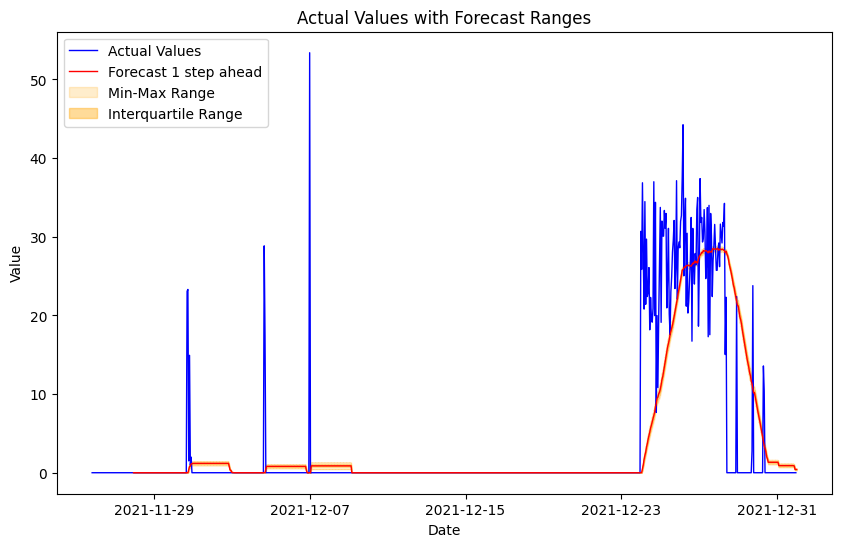

In [18]:
prediction_wrapper.plot_forecast_for_all(forecast_step_ahead=1, plot_forecast_distribution=True)

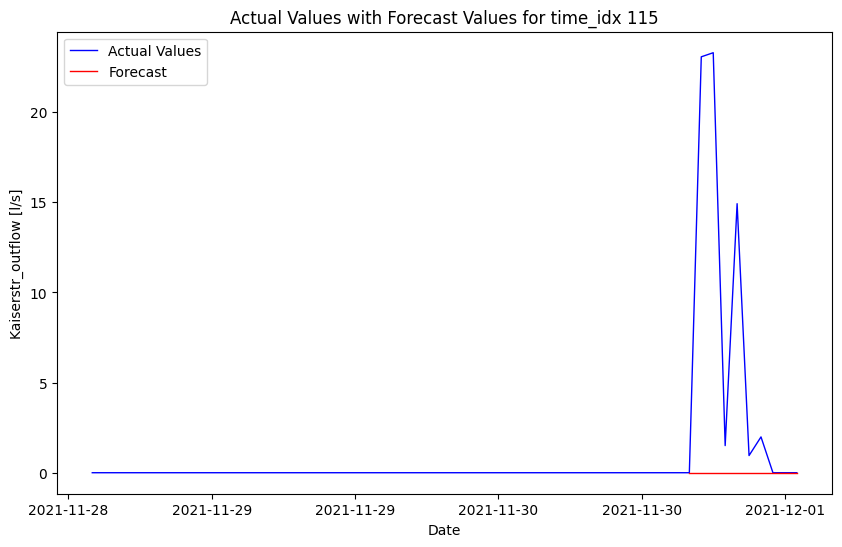

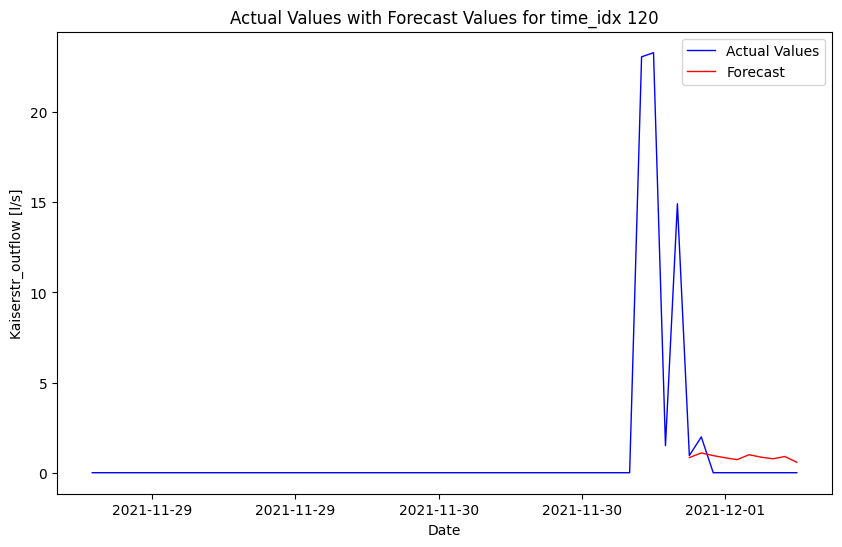

In [19]:
prediction_wrapper.plot_forecast_per_time_idx(115)
prediction_wrapper.plot_forecast_per_time_idx(120)

In [24]:
prediction_wrapper.calculate_mase_loss()

/storage/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


TypeError: MASE.update() missing 1 required positional argument: 'encoder_target'

In [23]:
print(model)

NHiTS(
  	"activation":                        ReLU
  	"backcast_loss_ratio":               1.0
  	"batch_normalization":               False
  	"categorical_groups":                {}
  	"context_length":                    50
  	"downsample_frequencies":            [8, 2, 1]
  	"dropout":                           0.1
  	"embedding_labels":                  {}
  	"embedding_paddings":                []
  	"embedding_sizes":                   {}
  	"hidden_size":                       512
  	"initialization":                    lecun_normal
  	"interpolation_mode":                linear
  	"learning_rate":                     5.623413251903491e-05
  	"log_gradient_flow":                 False
  	"log_interval":                      5
  	"log_val_interval":                  1
  	"logging_metrics":                   ModuleList(
  	  (0): SMAPE()
  	  (1): MAE()
  	  (2): RMSE()
  	  (3): MAPE()
  	  (4): MASE()
  	)
  	"loss":                              RMSE()
  	"monotone_constaints"